In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA, TruncatedSVD

# Start to test some model

## import of differrent sample of data set

In [2]:
active_users_df_10PlusRatings_partial = pd.read_csv('../data/Processed_data/active_users_df_10PlusRatings_partial.csv')

In [3]:
active_users_df_100PlusRatings_partial = pd.read_csv('../data/Processed_data/active_users_df_100PlusRatings_partial.csv')

In [4]:
rating_complete_df_10PlusRatings_partial = pd.read_csv('../data/Processed_data/rating_complete_df_10PlusRatings_partial.csv')

In [5]:
rating_complete_df_100PlusRatings_partial = pd.read_csv('../data/Processed_data/rating_complete_df_100PlusRatings_partial.csv')

In [6]:
anime_df_relevant_PG = pd.read_csv('../data/Processed_data/anime_df_relevant_PG.csv')

## data set normalisation

In [7]:
active_users_df_10PlusRatings_partial['rating'] = active_users_df_10PlusRatings_partial['rating']/10

In [8]:
active_users_df_100PlusRatings_partial['rating'] = active_users_df_100PlusRatings_partial['rating']/10

In [9]:
rating_complete_df_10PlusRatings_partial['rating'] = rating_complete_df_10PlusRatings_partial['rating']/10

In [10]:
rating_complete_df_100PlusRatings_partial['rating'] = rating_complete_df_100PlusRatings_partial['rating']/10

## data set merge

In [11]:
anime_name_df = anime_df_relevant_PG[['MAL_ID','Name']].rename(columns={'MAL_ID' : 'anime_id'})

In [12]:
active_users_df_10PlusRatings_partial_merge = active_users_df_10PlusRatings_partial.merge(anime_name_df, on = 'anime_id', how='inner')

In [13]:
active_users_df_100PlusRatings_partial_merge = active_users_df_100PlusRatings_partial.merge(anime_name_df, on = 'anime_id', how='inner')

In [14]:
rating_complete_df_10PlusRatings_partial_merge = rating_complete_df_10PlusRatings_partial.merge(anime_name_df, on = 'anime_id', how='inner')

In [15]:
rating_complete_df_100PlusRatings_partial_merge = rating_complete_df_100PlusRatings_partial.merge(anime_name_df, on = 'anime_id', how='inner')

## data set vectorization

### vectorize anime by genres

In [16]:
anime_Genres_df = anime_df_relevant_PG[['MAL_ID','Genres']].rename(columns={'MAL_ID' : 'anime_id'})

In [17]:
anime_Genres_df_encoded = pd.concat([anime_Genres_df.drop('Genres', 1), anime_Genres_df['Genres'].str.get_dummies(sep=", ")], 1)

/tmp/ipykernel_1781/3467840990.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  anime_Genres_df_encoded = pd.concat([anime_Genres_df.drop('Genres', 1), anime_Genres_df['Genres'].str.get_dummies(sep=", ")], 1)
/tmp/ipykernel_1781/3467840990.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  anime_Genres_df_encoded = pd.concat([anime_Genres_df.drop('Genres', 1), anime_Genres_df['Genres'].str.get_dummies(sep=", ")], 1)


In [18]:
anime_Genres_df_encoded = anime_Genres_df_encoded.set_index('anime_id')

In [19]:
anime_Genres_df_encoded.columns

Index(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Josei',
       'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire'],
      dtype='object')

In [20]:
anime_name_df

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
11043,47398,Kimetsu Gakuen: Valentine-hen
11044,47402,Heikousen
11045,47614,Nu Wushen de Canzhuo Spring Festival Special
11046,47616,Yakusoku no Neverland 2nd Season: Michishirube


### vectorize for active user and merge with  anime vectorized by genres

In [21]:
active_users_df_10PlusRatings_partial_pivot = active_users_df_10PlusRatings_partial_merge.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)

In [22]:
active_users_df_10PlusRatings_partial_pivot = active_users_df_10PlusRatings_partial_pivot.merge(anime_Genres_df_encoded, how='inner',left_index=True, right_index=True)

In [23]:
active_users_df_100PlusRatings_partial_pivot = active_users_df_100PlusRatings_partial_merge.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)

In [24]:
active_users_df_100PlusRatings_partial_pivot = active_users_df_100PlusRatings_partial_pivot.merge(anime_Genres_df_encoded, how='inner',left_index=True, right_index=True)

In [25]:
active_users_df_10PlusRatings_partial_pivot

,0,1,2,3,4,5,6,7,8,11,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.9,0.0,0.0,0.6,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
active_users_df_100PlusRatings_partial_pivot

,1,3,4,6,11,14,16,17,19,21,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.9,0.0,0.6,0.0,0.9,0.0,0.0,0.8,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,0,0,0,0,1,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,...,0,1,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [110]:
anime_id_name_df_10PlusRatings = active_users_df_10PlusRatings_partial_merge[['anime_id','Name']].drop_duplicates()
anime_id_name_df_10PlusRatings = anime_id_name_df_10PlusRatings.sort_values('anime_id')
anime_id_name_df_10PlusRatings = anime_id_name_df_10PlusRatings.reset_index().drop(columns = 'index')
anime_id_name_df_10PlusRatings

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
10177,47398,Kimetsu Gakuen: Valentine-hen
10178,47402,Heikousen
10179,47614,Nu Wushen de Canzhuo Spring Festival Special
10180,47616,Yakusoku no Neverland 2nd Season: Michishirube


In [28]:
active_users_df_100PlusRatings_partial_pivot.loc[[44]]

,1,3,4,6,11,14,16,17,19,21,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
anime_id_name_df_10PlusRatings.loc[[44]]

,anime_id,Name
44,63,DearS


In [30]:
anime_id_name_df_10PlusRatings.query('Name == "Naruto"')

,anime_id,Name
10,20,Naruto


In [31]:
anime_id_name_df_100PlusRatings = active_users_df_100PlusRatings_partial_merge[['anime_id','Name']].drop_duplicates()
anime_id_name_df_100PlusRatings = anime_id_name_df_100PlusRatings.sort_values('anime_id')
anime_id_name_df_100PlusRatings = anime_id_name_df_100PlusRatings.reset_index().drop(columns = 'index')
anime_id_name_df_100PlusRatings

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
10161,47398,Kimetsu Gakuen: Valentine-hen
10162,47402,Heikousen
10163,47614,Nu Wushen de Canzhuo Spring Festival Special
10164,47616,Yakusoku no Neverland 2nd Season: Michishirube


In [32]:
anime_id_name_df_10PlusRatings.query('Name == "Naruto"')

,anime_id,Name
10,20,Naruto


In [33]:
#pca can do at this step but not on a sample data set

### vectorize for anime completed and merge with  anime vectorized by genres

In [34]:
rating_complete_df_10PlusRatings_partial_merge['rating'] = 1

In [35]:
rating_complete_df_10PlusRatings_partial_merge.rename(columns={'rating' : 'complete'}, inplace =True)

In [36]:
rating_complete_df_10PlusRatings_partial_merge

,user_id,anime_id,complete,Name
0,0,430,1,Fullmetal Alchemist: The Conqueror of Shamballa
1,6,430,1,Fullmetal Alchemist: The Conqueror of Shamballa
2,18,430,1,Fullmetal Alchemist: The Conqueror of Shamballa
3,19,430,1,Fullmetal Alchemist: The Conqueror of Shamballa
4,33,430,1,Fullmetal Alchemist: The Conqueror of Shamballa
...,...,...,...,...
744818,4944,8146,1,Gegege no Kitarou: Daikaijuu
744819,4944,32888,1,Sinbad: Mahiru no Yoru to Fushigi no Mon
744820,4944,21305,1,Trick or Alice
744821,4986,39284,1,Tsuki no Uta


In [37]:
rating_complete_df_10PlusRatings_partial_pivot = rating_complete_df_10PlusRatings_partial_merge.pivot_table(index='anime_id',columns='user_id',values='complete').fillna(0)

In [38]:
rating_complete_df_10PlusRatings_partial_pivot = rating_complete_df_10PlusRatings_partial_pivot.merge(anime_Genres_df_encoded, how='inner',left_index=True, right_index=True)

In [39]:
rating_complete_df_10PlusRatings_partial_pivot

,0,1,2,3,4,5,6,7,8,11,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
anime_complete_id_name_df_10PlusRatings = rating_complete_df_10PlusRatings_partial_merge[['anime_id','Name']].drop_duplicates()
anime_complete_id_name_df_10PlusRatings = anime_complete_id_name_df_10PlusRatings.sort_values('anime_id')
anime_complete_id_name_df_10PlusRatings = anime_complete_id_name_df_10PlusRatings.reset_index().drop(columns = 'index')
anime_complete_id_name_df_10PlusRatings

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
10003,47398,Kimetsu Gakuen: Valentine-hen
10004,47402,Heikousen
10005,47614,Nu Wushen de Canzhuo Spring Festival Special
10006,47616,Yakusoku no Neverland 2nd Season: Michishirube


In [41]:
rating_complete_df_100PlusRatings_partial_merge['rating'] = 1
rating_complete_df_100PlusRatings_partial_merge.rename(columns={'rating' : 'complete'}, inplace =True)
rating_complete_df_100PlusRatings_partial_merge

,user_id,anime_id,complete,Name
0,1,22535,1,Kiseijuu: Sei no Kakuritsu
1,3,22535,1,Kiseijuu: Sei no Kakuritsu
2,17,22535,1,Kiseijuu: Sei no Kakuritsu
3,19,22535,1,Kiseijuu: Sei no Kakuritsu
4,42,22535,1,Kiseijuu: Sei no Kakuritsu
...,...,...,...,...
664214,4944,8146,1,Gegege no Kitarou: Daikaijuu
664215,4944,32888,1,Sinbad: Mahiru no Yoru to Fushigi no Mon
664216,4944,21305,1,Trick or Alice
664217,4986,39284,1,Tsuki no Uta


In [42]:
rating_complete_df_100PlusRatings_partial_pivot = rating_complete_df_100PlusRatings_partial_merge.pivot_table(index='anime_id',columns='user_id',values='complete').fillna(0)

In [43]:
rating_complete_df_100PlusRatings_partial_pivot = rating_complete_df_100PlusRatings_partial_pivot.merge(anime_Genres_df_encoded, how='inner',left_index=True, right_index=True)

In [44]:
rating_complete_df_100PlusRatings_partial_pivot

,1,3,4,6,11,16,17,19,21,25,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
anime_complete_id_name_df_100PlusRatings = rating_complete_df_100PlusRatings_partial_merge[['anime_id','Name']].drop_duplicates()
anime_complete_id_name_df_100PlusRatings = anime_complete_id_name_df_100PlusRatings.sort_values('anime_id')
anime_complete_id_name_df_100PlusRatings = anime_complete_id_name_df_100PlusRatings.reset_index().drop(columns = 'index')
anime_complete_id_name_df_100PlusRatings

,anime_id,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
9985,47398,Kimetsu Gakuen: Valentine-hen
9986,47402,Heikousen
9987,47614,Nu Wushen de Canzhuo Spring Festival Special
9988,47616,Yakusoku no Neverland 2nd Season: Michishirube


## reduction of param (PCA or SVD)

In [ ]:
active_users_df_10PlusRatings_partial_pivot
active_users_df_100PlusRatings_partial_pivot

rating_complete_df_10PlusRatings_partial_pivot
rating_complete_df_100PlusRatings_partial_pivot

In [100]:
pca_active_users_10Plus = PCA(n_components=3)
pca_active_users_10Plus.fit(active_users_df_10PlusRatings_partial_pivot)
pca_active_users_10Plus_df = pca_active_users_10Plus.transform(active_users_df_10PlusRatings_partial_pivot)

In [101]:
ps = pd.DataFrame(pca_active_users_10Plus_df)

In [102]:
ps

,0,1,2
0,14.973474,-7.181332,9.280272
1,5.144747,-5.312005,4.864335
2,8.543868,-6.687881,4.234835
3,0.570770,-2.244989,0.798736
4,-0.906365,-0.307924,0.190092
...,...,...,...
10177,-1.058466,0.310484,0.160363
10178,-1.255976,0.223132,0.032972
10179,-1.252122,0.215586,0.008045
10180,-1.078276,0.319846,0.257112


In [103]:
tocluster = pd.DataFrame(ps[[0,1,2]])

/tmp/ipykernel_1781/2303771990.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


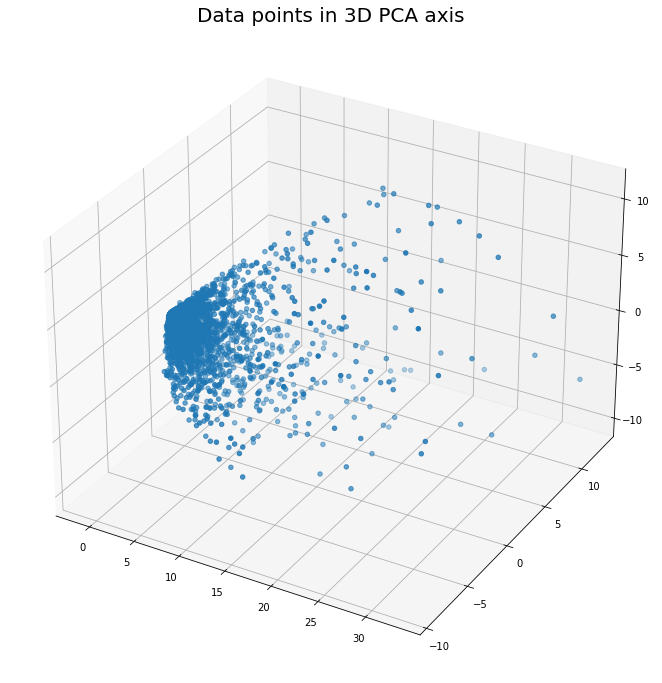

In [109]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

## KNN

### for active_users_df_10PlusRatings_partial_pivot

In [119]:
%%time

#test model knn for users
active_users_df_10PlusRatings_partial_pivot_matrix = csr_matrix(active_users_df_10PlusRatings_partial_pivot.values)

model_knn_10PlusRatings = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_10PlusRatings.fit(active_users_df_10PlusRatings_partial_pivot_matrix)

CPU times: user 17.6 s, sys: 15.6 s, total: 33.2 s
Wall time: 34 s


NearestNeighbors(algorithm='brute', metric='cosine')

### for active_users_df_10PlusRatings_partial_pivot after pca

In [120]:
%%time

#test model knn for users
active_users_df_10PlusRatings_partial_pivot_matrix_pca = csr_matrix(ps.values)

model_knn_pca_10PlusRatings = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_pca_10PlusRatings.fit(active_users_df_10PlusRatings_partial_pivot_matrix_pca)

CPU times: user 5.54 ms, sys: 0 ns, total: 5.54 ms
Wall time: 3.93 ms


NearestNeighbors(algorithm='brute', metric='cosine')

### active_users_df_100PlusRatings_partial_pivot

In [47]:
#test model knn for users
active_users_df_100PlusRatings_partial_pivot_matrix = csr_matrix(active_users_df_100PlusRatings_partial_pivot.values)

model_knn_100PlusRatings = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_100PlusRatings.fit(active_users_df_100PlusRatings_partial_pivot_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### rating_complete_df_10_partial_pivot

In [48]:
#test model knn for users
rating_complete_df_10PlusRatings_partial_pivot_matrix = csr_matrix(rating_complete_df_10PlusRatings_partial_pivot.values)

model_knn_complete_10PlusRatings = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_complete_10PlusRatings.fit(rating_complete_df_10PlusRatings_partial_pivot_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### rating_complete_df_100_partial_pivot

In [49]:
rating_complete_df_100PlusRatings_partial_pivot_matrix = csr_matrix(rating_complete_df_100PlusRatings_partial_pivot.values)

model_knn_complete_100PlusRatings = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_complete_100PlusRatings.fit(rating_complete_df_100PlusRatings_partial_pivot_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### Predictions and comparaisons of model with index row

In [50]:
# don't forget to when the distance for knn prediction is 0.0 is probably due lack of data and 
# not an extreme proximity of the anime

In [51]:
#Chose the anime 5 who is the same on the two vectorized data
index_nb = 25
n_neighbors = 15
distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)

In [52]:
active_users_df_100PlusRatings_partial_pivot.shape[0]

10166

In [53]:
anime_id_name_df_10PlusRatings.loc[25].Name

'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen'

In [54]:
active_users_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [55]:
#10PlusRatings
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(active_users_df_10PlusRatings_partial_pivot.index[index_nb]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 44:

1: 401, with distance of 0.3584510704225097:
2: 45, with distance of 0.4412344920491553:
3: 46, with distance of 0.5198177735481421:
4: 205, with distance of 0.6306822911114232:
5: 164, with distance of 0.6514185282119336:
6: 1, with distance of 0.6532132499033737:
7: 6, with distance of 0.6594495192648324:
8: 11441, with distance of 0.6777024884985369:
9: 72, with distance of 0.6832907565108806:
10: 5, with distance of 0.6833175351648948:
11: 267, with distance of 0.6848829520995819:
12: 2418, with distance of 0.6856527651060023:
13: 33, with distance of 0.6876457091619872:
14: 1818, with distance of 0.6882241799505108:


In [56]:
distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)

In [57]:
anime_id_name_df_10PlusRatings.query('anime_id == 44')

,anime_id,Name
25,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...


In [58]:
# How to obtain the nma of the anime from is anime_id
anime_id_name_df_10PlusRatings.query('anime_id == 44').iloc[0].Name

'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen'

In [59]:
print(anime_id_name_df_10PlusRatings.query('anime_id == 44').iloc[0].Name)

Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen


In [60]:
nb = 44
anime_id_name_df_10PlusRatings.query(f'anime_id == {nb}').iloc[0].Name

'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen'

In [61]:
#10PlusRatings list
distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)

prediction_10PlusRatings = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_10PlusRatings)):
    anime_name = anime_id_name_df_10PlusRatings.query(f'anime_id == {prediction_10PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_10PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen:
Rurouni Kenshin: Meiji Kenkaku Romantan - Seisou-hen, with distance of 0.3584510704225097
Rurouni Kenshin: Meiji Kenkaku Romantan, with distance of 0.4412344920491553
Rurouni Kenshin: Meiji Kenkaku Romantan - Ishinshishi e no Chinkonka, with distance of 0.5198177735481421
Samurai Champloo, with distance of 0.6306822911114232
Mononoke Hime, with distance of 0.6514185282119336
Cowboy Bebop, with distance of 0.6532132499033737
Trigun, with distance of 0.6594495192648324
Rurouni Kenshin: Meiji Kenkaku Romantan - Shin Kyoto-hen, with distance of 0.6777024884985369
Full Metal Panic? Fumoffu, with distance of 0.6832907565108806
Cowboy Bebop: Tengoku no Tobira, with distance of 0.6833175351648948
Gungrave, with distance of 0.6848829520995819
Stranger: Mukou Hadan, with distance of 0.6856527651060023
Kenpuu Denki Berserk, with distance of 0.6876457091619872
Claymore, with distance of 0.6882241799505108


In [62]:
anime_id_name_df_10PlusRatings.query(f'anime_id == {prediction_10PlusRatings[0][0]}').iloc[0].Name

'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen'

In [63]:
prediction_10PlusRatings[0][0]

44

In [64]:
#100PlusRatings list
distances, indices = model_knn_100PlusRatings.kneighbors(active_users_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)
prediction_100PlusRatings = []
for i in range(len(distances.flatten())):
    if i == 0:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_100PlusRatings)):
    anime_name = anime_id_name_df_100PlusRatings.query(f'anime_id == {prediction_100PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_100PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen:
Rurouni Kenshin: Meiji Kenkaku Romantan - Seisou-hen, with distance of 0.3328569482940108
Rurouni Kenshin: Meiji Kenkaku Romantan, with distance of 0.4025112118624564
Rurouni Kenshin: Meiji Kenkaku Romantan - Ishinshishi e no Chinkonka, with distance of 0.47648033772070286
Samurai Champloo, with distance of 0.5976485135355779
Trigun, with distance of 0.6350663596971027
Full Metal Panic? Fumoffu, with distance of 0.6361281063333539
Cowboy Bebop, with distance of 0.6362672287529976
Mononoke Hime, with distance of 0.6364660462779358
Rurouni Kenshin: Meiji Kenkaku Romantan - Shin Kyoto-hen, with distance of 0.6406270910188878
Gungrave, with distance of 0.6416285075724968
Full Metal Panic!, with distance of 0.6491594950121563
Fullmetal Alchemist, with distance of 0.6537517787465945
Cowboy Bebop: Tengoku no Tobira, with distance of 0.6546939282738695
Claymore, with distance of 0.6564810887608559


### prediction and comparaison with an anime name

In [65]:
anime_id_name_df_10PlusRatings.query('Name == "Naruto"')

,anime_id,Name
10,20,Naruto


In [66]:
n_neighbors = 15

In [67]:
index_nb = anime_id_name_df_10PlusRatings.index[anime_id_name_df_10PlusRatings['Name'] == "Naruto"].tolist()[0]

In [68]:
anime_id_name_df_10PlusRatings.index[anime_id_name_df_10PlusRatings['Name'] == "Naruto"].tolist()[0]

10

In [69]:
index_nb

10

In [70]:
#10PlusRatings list
distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)

prediction_10PlusRatings = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_10PlusRatings)):
    anime_name = anime_id_name_df_10PlusRatings.query(f'anime_id == {prediction_10PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_10PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Naruto:
Naruto: Shippuuden, with distance of 0.18049078542744756
Death Note, with distance of 0.3272437518799032
Bleach, with distance of 0.35922338431707357
Shingeki no Kyojin, with distance of 0.3764965221555533
Fullmetal Alchemist: Brotherhood, with distance of 0.4092187913883145
Code Geass: Hangyaku no Lelouch, with distance of 0.41415931597920275
Sword Art Online, with distance of 0.4145034622526955
One Piece, with distance of 0.43246932997058873
Fairy Tail, with distance of 0.43374727465720253
One Punch Man, with distance of 0.4406721372998613
Code Geass: Hangyaku no Lelouch R2, with distance of 0.44317776537599707
Tokyo Ghoul, with distance of 0.4478750610328678
Boku no Hero Academia, with distance of 0.45097734755300867
Fullmetal Alchemist, with distance of 0.45734048611945133


In [71]:
anime_id_name_df_100PlusRatings.query('Name == "Naruto"')

,anime_id,Name
10,20,Naruto


In [72]:
index_nb = anime_id_name_df_100PlusRatings.index[anime_id_name_df_100PlusRatings['Name'] == "Naruto"].tolist()[0]

In [73]:
index_nb

10

In [74]:
#100PlusRatings list
distances, indices = model_knn_100PlusRatings.kneighbors(active_users_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)
prediction_100PlusRatings = []
for i in range(len(distances.flatten())):
    if i == 0:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_100PlusRatings)):
    anime_name = anime_id_name_df_100PlusRatings.query(f'anime_id == {prediction_100PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_100PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Naruto:
Naruto: Shippuuden, with distance of 0.15516967217154087
Death Note, with distance of 0.2848835714687815
Bleach, with distance of 0.3062895355389962
Shingeki no Kyojin, with distance of 0.3096722585912889
Fullmetal Alchemist: Brotherhood, with distance of 0.338931604784668
Sword Art Online, with distance of 0.34410873051357505
Code Geass: Hangyaku no Lelouch, with distance of 0.3462897298922615
Fairy Tail, with distance of 0.3694736560717937
One Punch Man, with distance of 0.37036467228899506
Code Geass: Hangyaku no Lelouch R2, with distance of 0.37518298931842653
Tokyo Ghoul, with distance of 0.37811452786857214
Boku no Hero Academia, with distance of 0.38078608955758164
One Piece, with distance of 0.3850372607381164
Ao no Exorcist, with distance of 0.3885017578704102


In [75]:
anime_id_name_df_10PlusRatings.query('Name == "Mushishi"')

,anime_id,Name
417,457,Mushishi


In [76]:
anime_id_name_df_10PlusRatings.query('Name == "Beck"')

,anime_id,Name
38,57,Beck


In [77]:
index_nb = anime_id_name_df_10PlusRatings.index[anime_id_name_df_10PlusRatings['Name'] == "Beck"].tolist()[0]

In [78]:
#10PlusRatings list
distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)

prediction_10PlusRatings = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_10PlusRatings)):
    anime_name = anime_id_name_df_10PlusRatings.query(f'anime_id == {prediction_10PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_10PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Beck:
Great Teacher Onizuka, with distance of 0.5917903101437341
Samurai Champloo, with distance of 0.6302206837978149
NHK ni Youkoso!, with distance of 0.631696141979681
Black Lagoon, with distance of 0.6395070997045906
Nodame Cantabile, with distance of 0.640647768986048
Genshiken, with distance of 0.6516668110520863
FLCL, with distance of 0.6545938058916252
Detroit Metal City, with distance of 0.6567941462705711
Koukyoushihen Eureka Seven, with distance of 0.6586769660066759
Code Geass: Hangyaku no Lelouch, with distance of 0.6617284015963658
Bakuman., with distance of 0.6629083622746548
Cowboy Bebop, with distance of 0.6641822790017816
Nana, with distance of 0.666763563661467
Baccano!, with distance of 0.666951148201443


In [79]:
index_nb = anime_id_name_df_100PlusRatings.index[anime_id_name_df_100PlusRatings['Name'] == "Beck"].tolist()[0]

In [80]:
#100PlusRatings list
distances, indices = model_knn_100PlusRatings.kneighbors(active_users_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = n_neighbors)
prediction_100PlusRatings = []
for i in range(len(distances.flatten())):
    if i == 0:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
    else:
        prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])

for i in range(len(prediction_100PlusRatings)):
    anime_name = anime_id_name_df_100PlusRatings.query(f'anime_id == {prediction_100PlusRatings[i][0]}').iloc[0].Name
    distance = prediction_100PlusRatings[i][1]
    if i == 0:
        print(f'Recommendations for {anime_name}:')
    else:
        print(f'{anime_name}, with distance of {distance}')

Recommendations for Beck:
Great Teacher Onizuka, with distance of 0.5543059059762562
NHK ni Youkoso!, with distance of 0.5855015252415916
Samurai Champloo, with distance of 0.6025232343668067
Black Lagoon, with distance of 0.6040858467601
Nodame Cantabile, with distance of 0.604624622528213
FLCL, with distance of 0.618604133128144
Fullmetal Alchemist, with distance of 0.6188701456381132
Genshiken, with distance of 0.622682725909649
Black Lagoon: The Second Barrage, with distance of 0.6254898956891575
Death Note, with distance of 0.6255588548621809
Elfen Lied, with distance of 0.6270899600719407
Nana, with distance of 0.6277005139940497
Detroit Metal City, with distance of 0.6298809083862615
Code Geass: Hangyaku no Lelouch, with distance of 0.6303102551076898


In [81]:
# the model give response that are coherent

### Create fonction for using the model

In [82]:
def recomendation_100PlusRatings(anime_name, nb_recomendation = 10):
    index_nb = anime_id_name_df_100PlusRatings.index[anime_id_name_df_100PlusRatings['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_100PlusRatings.kneighbors(active_users_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation+1)
    prediction_100PlusRatings = []
    for i in range(len(distances.flatten())):
        if i == 0:
            prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
        else:
            prediction_100PlusRatings.append([active_users_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction_100PlusRatings)):
        anime_name = anime_id_name_df_100PlusRatings.query(f'anime_id == {prediction_100PlusRatings[i][0]}').iloc[0].Name
        distance = prediction_100PlusRatings[i][1]
        results.append([anime_name,distance])
    return results

In [83]:
def recomendation_10PlusRatings(anime_name, nb_recomendation = 10):
    index_nb = anime_id_name_df_10PlusRatings.index[anime_id_name_df_10PlusRatings['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_10PlusRatings.kneighbors(active_users_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation + 1)

    prediction_10PlusRatings = []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
        else:
            prediction_10PlusRatings.append([active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction_10PlusRatings)):
        anime_name = anime_id_name_df_10PlusRatings.query(f'anime_id == {prediction_10PlusRatings[i][0]}').iloc[0].Name
        distance = prediction_10PlusRatings[i][1]
        results.append([anime_name,distance])
    return results

In [84]:
active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()[0]]

57

In [85]:
active_users_df_10PlusRatings_partial_pivot.index[indices.flatten()]

Int64Index([57, 245, 1210, 205, 889, 1698, 227, 121, 240, 1519, 1535, 226, 877,
            3692, 1575],
           dtype='int64', name='anime_id')

In [86]:
indices.flatten()

array([  38,  213, 1067,  180,  776, 1466,  195,  100,  208, 1312, 1326,
        194,  764, 2763, 1362])

In [87]:
recomendation_100PlusRatings('Naruto')

[['Naruto', 0],
 ['Naruto: Shippuuden', 0.15516967217154087],
 ['Death Note', 0.2848835714687815],
 ['Bleach', 0.3062895355389962],
 ['Shingeki no Kyojin', 0.3096722585912889],
 ['Fullmetal Alchemist: Brotherhood', 0.338931604784668],
 ['Sword Art Online', 0.34410873051357505],
 ['Code Geass: Hangyaku no Lelouch', 0.3462897298922615],
 ['Fairy Tail', 0.3694736560717937],
 ['One Punch Man', 0.37036467228899506],
 ['Code Geass: Hangyaku no Lelouch R2', 0.37518298931842653]]

In [88]:
recomendation_10PlusRatings('Naruto')

[['Naruto', 0],
 ['Naruto: Shippuuden', 0.18049078542744756],
 ['Death Note', 0.3272437518799032],
 ['Bleach', 0.35922338431707357],
 ['Shingeki no Kyojin', 0.3764965221555533],
 ['Fullmetal Alchemist: Brotherhood', 0.4092187913883145],
 ['Code Geass: Hangyaku no Lelouch', 0.41415931597920275],
 ['Sword Art Online', 0.4145034622526955],
 ['One Piece', 0.43246932997058873],
 ['Fairy Tail', 0.43374727465720253],
 ['One Punch Man', 0.4406721372998613]]

In [89]:
def recomendation_completed_10PlusRatings(anime_name, nb_recomendation = 10):
    index_nb = anime_complete_id_name_df_10PlusRatings.index[anime_complete_id_name_df_10PlusRatings['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_complete_10PlusRatings.kneighbors(rating_complete_df_10PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation + 1)

    prediction_completed_10PlusRatings = []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            prediction_completed_10PlusRatings.append([rating_complete_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
        else:
            prediction_completed_10PlusRatings.append([rating_complete_df_10PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction_completed_10PlusRatings)):
        anime_name = anime_complete_id_name_df_10PlusRatings.query(f'anime_id == {prediction_completed_10PlusRatings[i][0]}').iloc[0].Name
        distance = prediction_completed_10PlusRatings[i][1]
        results.append([anime_name,distance])
    return results

In [90]:
def recomendation_completed_100PlusRatings(anime_name, nb_recomendation = 10):
    index_nb = anime_complete_id_name_df_100PlusRatings.index[anime_complete_id_name_df_100PlusRatings['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_complete_100PlusRatings.kneighbors(rating_complete_df_100PlusRatings_partial_pivot.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation + 1)

    prediction_completed_100PlusRatings = []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            prediction_completed_100PlusRatings.append([rating_complete_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],0])
        else:
            prediction_completed_100PlusRatings.append([rating_complete_df_100PlusRatings_partial_pivot.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction_completed_100PlusRatings)):
        anime_name = anime_complete_id_name_df_100PlusRatings.query(f'anime_id == {prediction_completed_100PlusRatings[i][0]}').iloc[0].Name
        distance = prediction_completed_100PlusRatings[i][1]
        results.append([anime_name,distance])
    return results

In [91]:
recomendation_completed_10PlusRatings('Naruto')

[['Naruto', 0],
 ['Death Note', 0.35472062005651295],
 ['Naruto: Shippuuden', 0.374840981788098],
 ['Shingeki no Kyojin', 0.39225444664686926],
 ['Code Geass: Hangyaku no Lelouch', 0.4245073395092307],
 ['Sword Art Online', 0.42571517625874833],
 ['Fullmetal Alchemist: Brotherhood', 0.429908125618944],
 ['Code Geass: Hangyaku no Lelouch R2', 0.4446439257187369],
 ['One Punch Man', 0.44527795583016117],
 ['Tokyo Ghoul', 0.45396393152651604],
 ['Boku no Hero Academia', 0.45976520632968576]]

In [92]:
recomendation_completed_100PlusRatings('Naruto')

[['Naruto', 0],
 ['Death Note', 0.306060586793648],
 ['Shingeki no Kyojin', 0.3315084065869063],
 ['Naruto: Shippuuden', 0.3328110974311389],
 ['Sword Art Online', 0.3539271472929737],
 ['Code Geass: Hangyaku no Lelouch', 0.36683227014122066],
 ['Fullmetal Alchemist: Brotherhood', 0.36958760764705056],
 ['One Punch Man', 0.3829826998065575],
 ['Tokyo Ghoul', 0.3881276129545702],
 ['Code Geass: Hangyaku no Lelouch R2', 0.3896777611876121],
 ['Boku no Hero Academia', 0.392858166464225]]

In [121]:
def recomendation_10PlusRatings_pca(anime_name, nb_recomendation = 10):
    index_nb = anime_id_name_df_10PlusRatings.index[anime_id_name_df_10PlusRatings['Name'] == anime_name].tolist()[0]
    distances, indices = model_knn_pca_10PlusRatings.kneighbors(ps.iloc[index_nb,:].values.reshape(1, -1), n_neighbors = nb_recomendation + 1)

    prediction_10PlusRatings = []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            prediction_10PlusRatings.append([ps.index[indices.flatten()[i]],0])
        else:
            prediction_10PlusRatings.append([ps.index[indices.flatten()[i]],distances.flatten()[i]])
    results = []
    for i in range(len(prediction_10PlusRatings)):
        anime_name = anime_id_name_df_10PlusRatings.query(f'anime_id == {prediction_10PlusRatings[i][0]}').iloc[0].Name
        distance = prediction_10PlusRatings[i][1]
        results.append([anime_name,distance])
    return results

In [122]:
recomendation_10PlusRatings_pca('Naruto')

IndexError: single positional indexer is out-of-bounds

### fonction for comparison all model

In [93]:
np.array(recomendation_100PlusRatings('Naruto'))[:,0]

array(['Naruto', 'Naruto: Shippuuden', 'Death Note', 'Bleach',
       'Shingeki no Kyojin', 'Fullmetal Alchemist: Brotherhood',
       'Sword Art Online', 'Code Geass: Hangyaku no Lelouch',
       'Fairy Tail', 'One Punch Man',
       'Code Geass: Hangyaku no Lelouch R2'], dtype='<U34')

In [94]:
Naruto_10PlusRatings = np.array(recomendation_10PlusRatings('Naruto'))[:,0]
Naruto_100PlusRatings = np.array(recomendation_100PlusRatings('Naruto'))[:,0]
Naruto_completed_10PlusRatings = np.array(recomendation_completed_10PlusRatings('Naruto'))[:,0]
Naruto_completed_100PlusRatings = np.array(recomendation_completed_100PlusRatings('Naruto'))[:,0]

In [95]:
list(Naruto_10PlusRatings)

['Naruto',
 'Naruto: Shippuuden',
 'Death Note',
 'Bleach',
 'Shingeki no Kyojin',
 'Fullmetal Alchemist: Brotherhood',
 'Code Geass: Hangyaku no Lelouch',
 'Sword Art Online',
 'One Piece',
 'Fairy Tail',
 'One Punch Man']

In [96]:
pd.DataFrame(list(zip(list(Naruto_10PlusRatings), list(Naruto_100PlusRatings),list(Naruto_completed_10PlusRatings),list(Naruto_completed_100PlusRatings))), columns =['10PlusRatings', '100PlusRatings','completed_10PlusRatings', 'completed_100PlusRatings'])

,10PlusRatings,100PlusRatings,completed_10PlusRatings,completed_100PlusRatings
0,Naruto,Naruto,Naruto,Naruto
1,Naruto: Shippuuden,Naruto: Shippuuden,Death Note,Death Note
2,Death Note,Death Note,Naruto: Shippuuden,Shingeki no Kyojin
3,Bleach,Bleach,Shingeki no Kyojin,Naruto: Shippuuden
4,Shingeki no Kyojin,Shingeki no Kyojin,Code Geass: Hangyaku no Lelouch,Sword Art Online
5,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,Sword Art Online,Code Geass: Hangyaku no Lelouch
6,Code Geass: Hangyaku no Lelouch,Sword Art Online,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood
7,Sword Art Online,Code Geass: Hangyaku no Lelouch,Code Geass: Hangyaku no Lelouch R2,One Punch Man
8,One Piece,Fairy Tail,One Punch Man,Tokyo Ghoul
9,Fairy Tail,One Punch Man,Tokyo Ghoul,Code Geass: Hangyaku no Lelouch R2


In [97]:
def compare(anime_name, nb_recomendation = 10):
    _10PlusRatings = np.array(recomendation_10PlusRatings(anime_name, nb_recomendation ))[:,0]
    _100PlusRatings = np.array(recomendation_100PlusRatings(anime_name, nb_recomendation ))[:,0]
    completed_10Plus = np.array(recomendation_completed_10PlusRatings(anime_name, nb_recomendation ))[:,0]
    completed_100Plus = np.array(recomendation_completed_100PlusRatings(anime_name, nb_recomendation ))[:,0]
    return pd.DataFrame(list(zip(list(_10PlusRatings), list(_100PlusRatings),list(completed_10Plus),list(completed_100Plus))), columns =['10PlusRatings', '100PlusRatings','completed_10Plus', 'completed_100Plus'])

In [98]:
compare('Naruto')

,10PlusRatings,100PlusRatings,completed_10Plus,completed_100Plus
0,Naruto,Naruto,Naruto,Naruto
1,Naruto: Shippuuden,Naruto: Shippuuden,Death Note,Death Note
2,Death Note,Death Note,Naruto: Shippuuden,Shingeki no Kyojin
3,Bleach,Bleach,Shingeki no Kyojin,Naruto: Shippuuden
4,Shingeki no Kyojin,Shingeki no Kyojin,Code Geass: Hangyaku no Lelouch,Sword Art Online
5,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,Sword Art Online,Code Geass: Hangyaku no Lelouch
6,Code Geass: Hangyaku no Lelouch,Sword Art Online,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood
7,Sword Art Online,Code Geass: Hangyaku no Lelouch,Code Geass: Hangyaku no Lelouch R2,One Punch Man
8,One Piece,Fairy Tail,One Punch Man,Tokyo Ghoul
9,Fairy Tail,One Punch Man,Tokyo Ghoul,Code Geass: Hangyaku no Lelouch R2
